## 딥러닝

### 인공신경망

#### Tensorflow
- https://www.tensorflow.org/?hl=ko
- 딥러닝 라이브러리 중 가장 유명
- 구글 브레인팀에서 개발

#### PyTorch
- https://pytorch.org/
- https://pytorch.kr/
- 메타(페이스북)에서 개발한 딥러닝 라이브러리
- GPU 사용이 매우 용이해서 빨리 처리가능

#### MNIST 데이터
- AI에서 많이 사용하는 데이터셋 중 하나
- 미국 국립표준기술연구소에서 배포하는 이미지 데이터
- 손글씨(0~9), 붓꽃데이터, 패션데이터, Cifar10(컬러 이미지)등 존재

Fashion MNIST

In [1]:
# 텐서플로우 사용
from tensorflow import keras

In [2]:
# 패션MNIST를 로드하면서 훈련 세트와 테스트 세트로 분리
# sklearn train_test_split()와 변수 배치가 다름!
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
# 60000개 이미지 데이터, 넓이 28픽셀, 높이 28픽셀
train_input.shape

(60000, 28, 28)

In [4]:
# 60000개 이미지에 대한 분류값
train_target.shape

(60000,)

#### 이미지 시각화

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

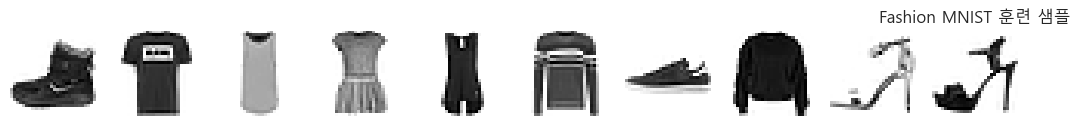

In [7]:
# 10개 차트 그리기
fig, axes = plt.subplots(1, 10, figsize=(13, 2))
for i in range(10):
    axes[i].imshow(train_input[i], cmap='gray_r')
    axes[i].axis('off')

plt.title('Fashion MNIST 훈련 샘플')
plt.show()

- 이미지는 픽셀당 흑백은 1byte, 컬러는 3~4bytes를 사용
- 해상도가 커지면 이미지 파일 사이즈가 기하급수적으로 증가
- 28x28 정도로 제한

In [8]:
#
[train_target[i] for i in  range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

| 레이블 | 0     | 1    | 2     | 3     | 4    | 5     | 6     | 7        | 8    | 9        |
|:------:|:-----:|:----:|:-----:|:-----:|:----:|:-----:|:-----:|:--------:|:----:|:--------:|
| 패션MNIST | 티셔츠 | 바지 | 스웨터 | 드레스 | 코트 | 샌달 | 셔츠 | 스니커즈 | 가방 | 앵클부츠 |


In [9]:
# 60000개 데이터에서 각 레이블 별 6000개씩 이미지가 존재
np.unique(train_target, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

#### 사이킷런 머신러닝, 로지스틱회귀로 아이템 분류

In [10]:
# 사이킷런 모듈 로드
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split    ## 이거 필요없음

##### 이미지처리
- 28 x 28 2차원 배열을 784 1차원 배열로 변경해줘야 함

    <img src='../image/ml0009.png' width='500'>



In [11]:
# 2D 이미지를 1D 벡터(1차원 배열)로 펼치기
train_input = train_input.reshape(-1, 28*28)

In [12]:
train_input.shape

(60000, 784)

In [13]:
test_input = test_input.reshape(-1, 28*28)

In [14]:
test_input.shape

(10000, 784)

In [15]:
# 스케일링(정규화)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.fit_transform(test_input.astype(np.float64))

In [16]:
# 로지스틱 회귀 모델
lr = LogisticRegression(C = 20, max_iter=1000)
lr

LogisticRegression(C=20, max_iter=1000)

In [17]:
# 훈련
lr.fit(train_scaled, train_target)

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=20, max_iter=1000)

In [18]:
lr.score(train_scaled, train_target)

0.8873

In [19]:
# 정확도
lr.score(test_scaled, test_target)

0.8309

In [20]:
# 예측
pred_result = lr.predict(test_scaled)

In [21]:
# 테스트 이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    plt.title(f'실제: {test_target[index]}, 예측: {pred_result[index]}')
    plt.axis('off')
    plt.show()

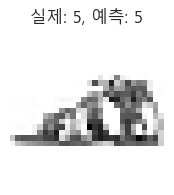

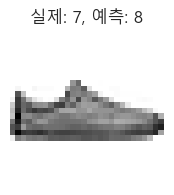

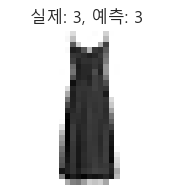

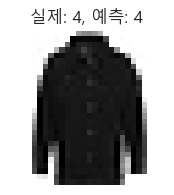

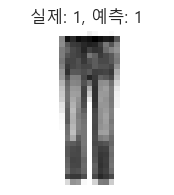

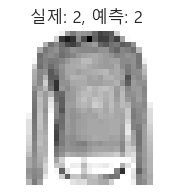

In [22]:
for i in range(11, 17):
    show_image(i)

- 여기까지 머신러닝으로 처리

#### 인공신경망

- 인간의 뇌 속 뉴런과 유사한 구조로 만든 것
- 인공신경망을 이용해서 머신러닝 훈련과 테스트, 예측 등을 수행하는 것
- 인공지능 ⊃ 머신러닝 ⊃ 딥러닝(인공신경망)
- 정확도가 높아서 딥러닝 가장 많이 사용(트렌드)

<img src='../image/ml0010.png' width='700'>

In [23]:
# 텐서플로우 모듈 로드
import tensorflow as tf
from tensorflow import keras

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# train_test_split() 함수로 기존 훈련세트를 훈련세트:검증세트 8:2로 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [26]:
train_scaled.shape

(48000, 784)

- 기존 훈련 세트 -> 60000
- 새 훈련 세트 -> 48000
- 검증 세트 -> 12000

- 밀집층(Dense layer)
    - 784픽셀(28*28)을 10개(분류된 아이템 개수) 뉴런을 연결하면 7840개 연결선이 만들어짐

In [27]:
# 매개변수
## 10 출력값(아이템 0~9)
## activation 활성화함수 : softmax, sigmoid, ReLU...
## 입력크기 : 28*28
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, ))

In [28]:
model = keras.Sequential(dense)

In [29]:
# 훈련전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [30]:
# 훈련
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100


1500/1500 [==============================] - 2s 768us/step - loss: 0.5514 - accuracy: 0.8134
Epoch 2/100
1500/1500 [==============================] - 1s 775us/step - loss: 0.4630 - accuracy: 0.8470
Epoch 3/100
1500/1500 [==============================] - 1s 813us/step - loss: 0.4494 - accuracy: 0.8510
Epoch 4/100
1500/1500 [==============================] - 1s 888us/step - loss: 0.4414 - accuracy: 0.8535
Epoch 5/100
1500/1500 [==============================] - 1s 788us/step - loss: 0.4360 - accuracy: 0.8563
Epoch 6/100
1500/1500 [==============================] - 1s 803us/step - loss: 0.4315 - accuracy: 0.8590
Epoch 7/100
1500/1500 [==============================] - 1s 762us/step - loss: 0.4283 - accuracy: 0.8595
Epoch 8/100
1500/1500 [==============================] - 1s 768us/step - loss: 0.4294 - accuracy: 0.8610
Epoch 9/100
1500/1500 [==============================] - 1s 744us/step - loss: 0.4261 - accuracy: 0.8596
Epoch 10/100
1500/1500 [=============================

In [31]:
# 검증
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 738us/step - loss: 0.6448 - accuracy: 0.8378


[0.6448322534561157, 0.8378333449363708]

#### 결론
- 딥러닝 : 인공신경망, 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘
    - 이미지, 음성, 텍스트, 영상 분야에 뛰어난 성능 발휘
- 밀집층 : Dense Layer. 가장 간단한 인공신경망
- 원-핫 인코딩 : 해당 요소만 1로 나머지는 0으로 변환하는 방식
    - [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] - 티셔츠
    - [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] - 스니커즈